In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#그래프 기본 설정
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,5)

#print 옵션
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 500)

#워닝 안뜨게
import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)

## Load Dataset

* https://www.kaggle.com/austinreese/craigslist-carstrucks-data

In [3]:
df = pd.read_csv('./craigslistVehicles.csv')

In [4]:
df.head()

,url,city,city_url,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,desc,lat,long
0,https://abilene.craigslist.org/cto/d/aspermont-2009-chevrolet-suburban-lt/6977351526.html,"abilene, TX",https://abilene.craigslist.org,9000,2009.0,chevrolet,suburban lt2,good,8 cylinders,gas,217743.0,clean,automatic,1GFNC26099R211276,rwd,full-size,SUV,white,https://images.craigslist.org/00909_5P6f1E6zHlj_600x450.jpg,2WD 1/2 ton\nLeather Captains Chairs\nIn good condition- 217743 miles\n2 owner family car,33.130100,-100.234400
1,https://abilene.craigslist.org/ctd/d/liberty-hill-2012-ram-2500-slt-mega-cab/6977347322.html,"abilene, TX",https://abilene.craigslist.org,31999,2012.0,ram,2500,NaN,NaN,diesel,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00u0u_24XW8uhLYPb_600x450.jpg,"www.GETADIESEL.com\n2012 RAM 2500 SLT 4X4 MEGA CAB\n\n6.7L CUMMINS TURBO DIESEL\n\n6 AUTOMATIC TRANSMISSION \n\n4 WHEEL DRIVE\n\nONLY 110K MILES\n\n2 OWNER\n\nTEXAS TRUCK \n\n35X12.50X17 BFG AT TIRES\n\nFIXED CENTER CONSOLE\n\nPOWER DRIVER SEAT\n\nPOWER SLIDING REAR WINDOW\n\nPOWER WINDOWS \n\nPOWER LOCKS\n\nELECTRONIC 4X4\n\nCARFAX CERTIFIED!! \n\nCALL OR TEXT FOR MORE PICTURES OR VIDEOS!!!\n\nTRADE INS? YES, WE TAKE THEM! CONTACT US WITH YOUR VEHICLE INFO FOR A FREE APPRAISAL!\n\nWANT TO S...",30.648368,-97.862949
2,https://abilene.craigslist.org/ctd/d/liberty-hill-2003-dodge-ram-3500/6977302857.html,"abilene, TX",https://abilene.craigslist.org,16990,2003.0,ram,3500,NaN,NaN,diesel,NaN,clean,manual,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00l0l_H1UKTJ4sTI_600x450.jpg,"www.GETADIESEL.com\n2003 DODGE RAM 3500 LARAMIE 4X4 \n\n5.9L CUMMINS TURBO DIESEL\n\n6 SPEED MANUAL TRANSMISSION \n\n4 WHEEL DRIVE\n\n261K MILES\n\nCLEAN CARFAX\n\nTEXAS TRUCK \n\nLOCALLY OWNED\n\n35X12.50X17 TOYO RT TIRES\n\nPOWER WINDOWS \n\nPOWER LOCKS\n\nFACTORY HEATED SEATS\n\nFACTORY ELECTRONIC 4X4 \n\nHARD TO FIND 6 SPEED MANUAL\n\nCARFAX CERTIFIED!! \n\nCALL OR TEXT FOR MORE PICTURES OR VIDEOS!!!\n\nTRADE INS? YES, WE TAKE THEM! CONTACT US WITH YOUR VEHICLE INFO FOR A FREE APPRAISAL!...",30.648516,-97.862434
3,https://abilene.craigslist.org/cto/d/merkel-2002-gmc-sierra-1500/6977272965.html,"abilene, TX",https://abilene.craigslist.org,6000,2002.0,gmc,sierra 1500,good,8 cylinders,gas,195000.0,clean,automatic,NaN,4wd,NaN,pickup,white,https://images.craigslist.org/00M0M_2wKzc7dKLU1_600x450.jpg,"2002 GMC Sierra Extended Cab Truck For Sale! Runs good and everything works! My son is going into the military and just doesnât need it anymore. Has a new stereo system and seat covers for front and back seats. Donât hesitate to ask questions or to make an offer. Serious inquiries only, please! Thanks and God Bless.",32.444400,-99.992400
4,https://abilene.craigslist.org/cto/d/breckenridge-2012-chevrolet-lincoln/6977231838.html,"abilene, TX",https://abilene.craigslist.org,37000,2012.0,chevrolet,3500,excellent,8 cylinders,diesel,178000.0,clean,automatic,NaN,4wd,full-size,pickup,silver,https://images.craigslist.org/00r0r_eW1YWlKfCGd_600x450.jpg,"2012 Chevrolet 3500 178k miles, runs and drives good\n\n1978 SA200 blackface recently restored, starts, runs, and welds great \n\nWelding bed in great shape everything is in proper working c",32.781689,-98.942248


## Filter used column only

In [5]:
df = df[['city', 'price', 'year', 'manufacturer', 'make', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'size', 'type', 'paint_color']]

In [6]:
df.head()

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,"abilene, TX",9000,2009.0,chevrolet,suburban lt2,good,8 cylinders,gas,217743.0,automatic,rwd,full-size,SUV,white
1,"abilene, TX",31999,2012.0,ram,2500,NaN,NaN,diesel,NaN,automatic,NaN,NaN,NaN,NaN
2,"abilene, TX",16990,2003.0,ram,3500,NaN,NaN,diesel,NaN,manual,NaN,NaN,NaN,NaN
3,"abilene, TX",6000,2002.0,gmc,sierra 1500,good,8 cylinders,gas,195000.0,automatic,4wd,NaN,pickup,white
4,"abilene, TX",37000,2012.0,chevrolet,3500,excellent,8 cylinders,diesel,178000.0,automatic,4wd,full-size,pickup,silver


## Price difference by odometer per year

In [7]:
odo_df = df[df.odometer.notna()]
odo_df['using_period'] = 2019 - odo_df.year + 2
odo_df['odometer_per_yr'] = odo_df.odometer / odo_df.using_period
odo_df.odometer_per_yr = odo_df.odometer_per_yr.fillna(-1)
odo_df['odometer_grp'] = (odo_df.odometer_per_yr / 10000).astype(int)
odo_df.head()

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,using_period,odometer_per_yr,odometer_grp
0,"abilene, TX",9000,2009.0,chevrolet,suburban lt2,good,8 cylinders,gas,217743.0,automatic,rwd,full-size,SUV,white,12.0,18145.250000,1
3,"abilene, TX",6000,2002.0,gmc,sierra 1500,good,8 cylinders,gas,195000.0,automatic,4wd,NaN,pickup,white,19.0,10263.157895,1
4,"abilene, TX",37000,2012.0,chevrolet,3500,excellent,8 cylinders,diesel,178000.0,automatic,4wd,full-size,pickup,silver,9.0,19777.777778,1
5,"abilene, TX",3700,2003.0,NaN,F150,fair,8 cylinders,gas,269000.0,automatic,4wd,NaN,pickup,silver,18.0,14944.444444,1
6,"abilene, TX",19950,2013.0,ford,f-250,NaN,8 cylinders,gas,116792.0,automatic,4wd,full-size,pickup,white,8.0,14599.000000,1


In [8]:
q1 = odo_df.groupby('odometer_grp').price.mean().quantile(.25)
q3 = odo_df.groupby('odometer_grp').price.mean().quantile(.75)
mask = odo_df.groupby('odometer_grp').price.mean().between(q1, q3, inclusive=True)
iqr = odo_df.groupby('odometer_grp').price.mean()[mask]

In [9]:
odo_sample_df = odo_df[odo_df.odometer_grp.isin(iqr.index)][['odometer_grp', 'price']]

In [10]:
odo_sample_df.odometer_grp.unique()

array([  2,   3,   5,  15,  12,   9,  11,  14, 113,  69,  17,  44,  61,
        71,  58,  25,  16,  46,  30,  51,  21,  70,  63, 108,  96,  24,
        65,  31])

In [11]:
odo_data = []
for o in odo_sample_df.odometer_grp.unique():
    odo_data.append(odo_sample_df[odo_sample_df.odometer_grp == o].price.values)

In [12]:
F_statistic, pVal = stats.f_oneway(*odo_data)

In [13]:
pVal

4.0337940923268076e-13

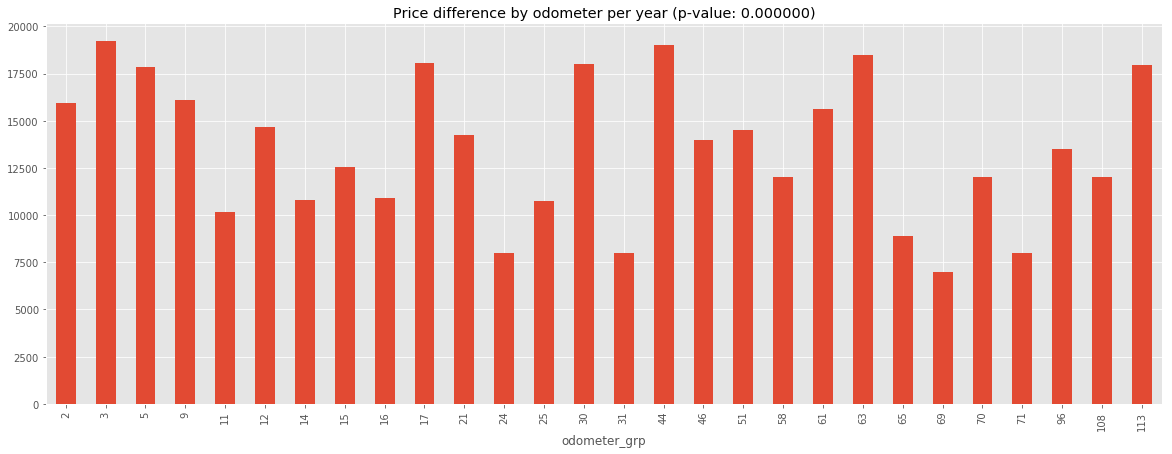

In [14]:
iqr.plot(kind='bar', figsize=(20, 7), title='Price difference by odometer per year (p-value: %f)' % pVal)

## Price difference by color in same model (Chevrolet Silverado)

* year: 2016
* condition: Excellent
* cyliner type: 6 cylinders
* drivetrain layout: 4WD
* size: Full size
* type: Truck

In [60]:
df.reset_index().groupby(['manufacturer', 'make'])['index'].count().reset_index().sort_values('index', ascending=False).head()

,manufacturer,make,index
10594,ford,f-150,11977
5740,chevrolet,silverado 1500,7543
25011,ram,1500,6891
5731,chevrolet,silverado,5801
16369,honda,accord,4390


In [61]:
df[(df.manufacturer == 'chevrolet') & (df.make == 'silverado')].paint_color.unique()

array([nan, 'green', 'black', 'red', 'white', 'custom', 'blue', 'brown',
       'grey', 'silver', 'orange', 'purple', 'yellow'], dtype=object)

In [62]:
sample_car_df = df[(df.manufacturer == 'chevrolet') & (df.make == 'silverado')]

In [63]:
sample_car_df.head()

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
95,"albany, NY",19900,2011.0,chevrolet,silverado,excellent,8 cylinders,gas,71300.0,automatic,NaN,NaN,NaN,NaN
204,"albany, NY",7995,2005.0,chevrolet,silverado,excellent,8 cylinders,gas,124715.0,automatic,4wd,full-size,truck,green
205,"albany, NY",27000,2012.0,chevrolet,silverado,NaN,NaN,diesel,NaN,automatic,NaN,NaN,NaN,NaN
366,"amarillo, TX",16579,2008.0,chevrolet,silverado,excellent,NaN,diesel,NaN,automatic,NaN,NaN,NaN,NaN
387,"amarillo, TX",53468,2015.0,chevrolet,silverado,excellent,NaN,diesel,NaN,automatic,NaN,NaN,NaN,NaN


In [64]:
sample_year = sample_car_df.groupby('year').city.count().sort_values(ascending=False).head(1).index[0]

In [65]:
condition = (sample_car_df.year == sample_year)

In [66]:
sample_condition = sample_car_df[condition].groupby('condition').city.count().sort_values(ascending=False).head(1).index[0]

In [67]:
condition = condition & (sample_car_df.condition == sample_condition)

In [69]:
sample_cylinders = sample_car_df[condition].groupby('cylinders').city.count().sort_values(ascending=False).head(1).index[0]

In [70]:
condition = condition & (sample_car_df.cylinders == sample_cylinders)

In [71]:
sample_transmission = sample_car_df[condition].groupby('transmission').city.count().sort_values(ascending=False).head(1).index[0]

In [72]:
condition = condition & (sample_car_df.transmission == sample_transmission)

In [73]:
sample_fuel = sample_car_df[condition].groupby('fuel').city.count().sort_values(ascending=False).head(1).index[0]

In [74]:
condition = condition & (sample_car_df.fuel == sample_fuel)

In [75]:
sample_drive = sample_car_df[condition].groupby('drive').city.count().sort_values(ascending=False).head(1).index[0]

In [76]:
condition = condition & (sample_car_df.drive == sample_drive)

In [77]:
sample_size = sample_car_df[condition].groupby('size').city.count().sort_values(ascending=False).head(1).index[0]

In [78]:
condition = condition & (sample_car_df['size'] == sample_size)

In [80]:
sample_type = sample_car_df[condition].groupby('type').city.count().sort_values(ascending=False).head(1).index[0]

In [81]:
condition = condition & (sample_car_df['type'] == sample_type)

In [91]:
print('year: %d\ncondition: %s\ncylinder type: %s\ntransmission type: %s\nfuel type: %s\ndrivetrain layout: %s\nsize: %s\ntype: %s' % (sample_year, sample_condition, sample_cylinders, sample_transmission, sample_fuel, sample_drive, sample_size, sample_type))

year: 2015
condition: excellent
cylinder type: 8 cylinders
transmission type: automatic
fuel type: gas
drivetrain layout: 4wd
size: full-size
type: truck


In [82]:
color_sample_df = sample_car_df[condition][['paint_color', 'price']]

In [83]:
color_sample_df.paint_color.unique()

array(['white', 'silver', 'black', 'red', 'blue'], dtype=object)

In [84]:
color_data = []
for c in color_sample_df.paint_color.unique():
    color_data.append(color_sample_df[color_sample_df.paint_color == c].price.values)

In [85]:
F_statistic, pVal = stats.f_oneway(*color_data)

In [86]:
pVal

0.021701001044584403

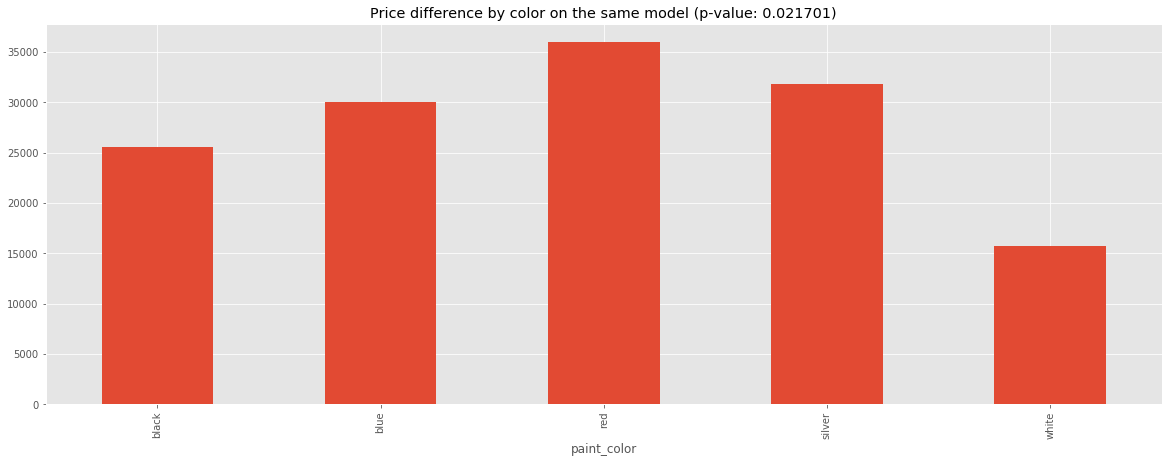

In [95]:
plot1 = sample_car_df[condition].groupby('paint_color').price.mean().plot(kind='bar', figsize=(20, 7), title='Price difference by color on the same model (p-value: %f)' % pVal).figure

In [96]:
plot1.show()